# MAB Full Demo - Advertising Example

# Steps:
1. instantiate required modules
2. create two 'ads' with assumed CTR's
3. show initial (Beta) prior probabilities
4. simulate the process of users seeing/clicking-on the ads & show posterior probabilities (Beta priors) and Bernoulli observations)
5. show conversion and 'winner'
6. repeat with different CTR's

In [1]:
# Imports
# import pandas as pd
# pd.set_option('display.max_rows', 200)
# from IPython.display import display
# import seaborn as sns
# sns.set_style('dark')

from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import beta
import random
from scipy.stats import bernoulli

In [2]:
# Set random seed, priors and CTRs
priors = (1, 1)
CTR_KNOWN = [0.4, 0.6]

In [129]:
def plot_beta(priors, clicks, impressions, ctr_known, normalize=1):
    """
    Helper method to plot beta distributions
    """
    x = np.arange (0, 1, 0.01)
    y = beta.pdf(x, priors[0]+clicks, priors[1] + impressions - clicks)
    if normalize:
        y/=y.max() #Normalize
    
    plt.plot(x, y, lw=4, alpha=0.6)
    if impressions == 0:
        ctr = 0
    else:
        ctr = clicks/impressions
        
    plt.title('{:,} Clicks & {:} Impressions\nCalculated CTR: {:.2f}\nActual CTR: {:}'.format(clicks, impressions, ctr, ctr_known))
    
    plt.xlim([0, 1])
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.patch.set_facecolor([0,0,0,0])
    
def sub_plot_beta(priors, clicks, impressions, show_ctr_sample=0, normalize=1):
    """
    Make subplots for two ads
    
    Returns 'winning' index if show_ctr_sample == 1
    """
    
    if show_ctr_sample:
        ctrA = get_sample(priors, clicks[0], impressions[0])
        ctrB = get_sample(priors, clicks[1], impressions[1])
        
    plt.figure(figsize=(10, 4))

    # Plot Ad A
    ax = plt.subplot(121)
    plot_beta(priors, clicks=clicks[0], impressions=impressions[0], ctr_known=CTR_KNOWN[0])
    ax.patch.set_facecolor([.5, .5, 1, .5])
    if show_ctr_sample:
        plt.text(.12, .5, "Drawn CTR: {:.2f}".format(ctrA), fontsize=25, color='white')
    plt.ylim([0, 1.1])

    # Plot Ad B
    ax = plt.subplot(122)
    plot_beta(priors, clicks=clicks[1], impressions=impressions[1], ctr_known=CTR_KNOWN[1])
    ax.patch.set_facecolor([.5, 1, .5, .5])
    if show_ctr_sample:
        plt.text(.12, .5, "Drawn CTR: {:.2f}".format(ctrB), fontsize=25, color='white')
    plt.ylim([0, 1.1])
    plt.show()
    
    if show_ctr_sample:
        return np.argmax([ctrA, ctrB])
    
def get_sample(priors, clicks, impressions):
    """
    #Assume len(clicks) = len(impressions)
    """
    return random.betavariate(priors[0]+clicks, priors[1] + impressions - clicks)

def return_click_choice(ctr):
    return bernoulli.rvs(ctr)

def increment_vals(clicks, impressions, win_index, did_click):
    
    if did_click:
        clicks[win_index] += 1
    
    impressions[win_index] += 1
    return clicks, impressions

# Assume we have two ads, A (blue) & B (green)
- Neither has any impressions
- We know nothing about the CTR of either ad

In this case, it is equally probable that we'll pick either ad to show
----
# Zero Clicks/Impressions:

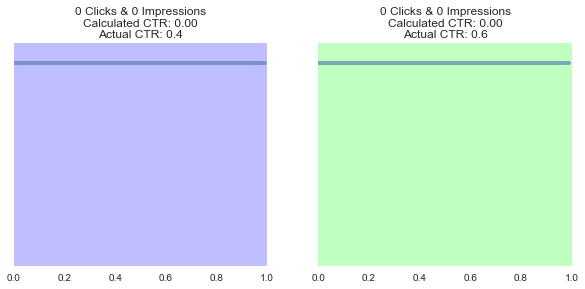

In [130]:
clicks = [0, 0]
impressions = [0, 0]
sub_plot_beta(priors, clicks, impressions)

#Sample from both distributions and generate two CTRs

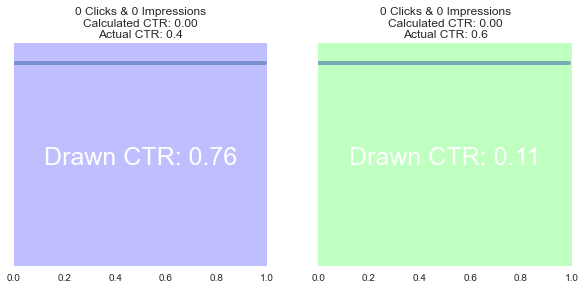

Index of winning ad: 0


In [136]:
win_index = sub_plot_beta(priors, clicks, impressions, 1)
print "Index of winning ad:", win_index

# See if the user clicked on the ad (by using the known CTR of the winner)

In [137]:
did_click = bool(return_click_choice(CTR_KNOWN[win_index]))
print did_click

True


# Increment Clicks/Impressions, then Sample Again

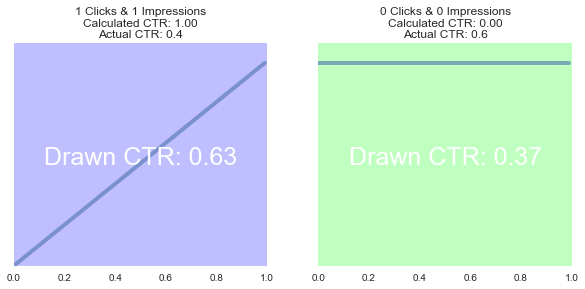

In [138]:
# Increment metrics
clicks, impressions = increment_vals(clicks, impressions, win_index, did_click)

# Plot and sample again from new distribution
sub_plot_beta(priors, clicks, impressions, 1);

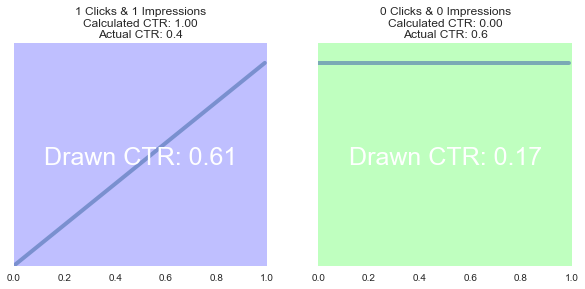

Index of winning ad: 0
Did user click ad? True


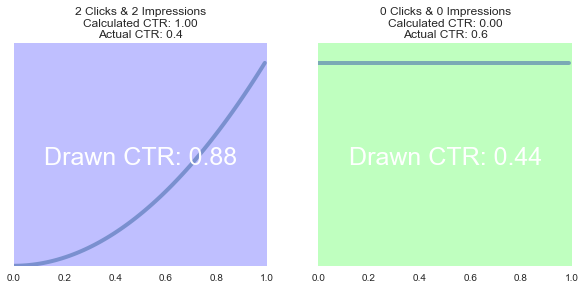

Index of winning ad: 0


In [139]:
# Which ad received the higher sample CTR?
win_index = sub_plot_beta(priors, clicks, impressions, 1)
print "Index of winning ad:", win_index

# Did the user click?
did_click = bool(return_click_choice(CTR_KNOWN[win_index]))
print "Did user click ad?", did_click

# Increment metrics based on a click or not
clicks, impressions = increment_vals(clicks, impressions, win_index, did_click)

# Plot and sample again from new distribution
sub_plot_beta(priors, clicks, impressions, 1)

# Which ad received the higher sample CTR?
print "Index of winning ad:", win_index

# Loop multiple times

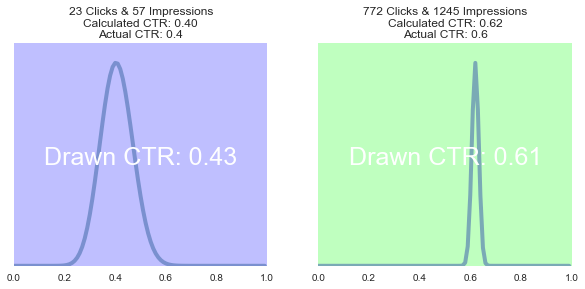

In [141]:
for i in range(1000):

    ctrA = get_sample(priors, clicks[0], impressions[0])
    ctrB = get_sample(priors, clicks[1], impressions[1])

    # Did the user click?
    did_click = bool(return_click_choice(CTR_KNOWN[win_index]))

    # Increment metrics based on a click or not
    clicks, impressions = increment_vals(clicks, impressions, win_index, did_click)

    # Which won?
    ctrA = get_sample(priors, clicks[0], impressions[0])
    ctrB = get_sample(priors, clicks[1], impressions[1])
        
    win_index = np.argmax([ctrA, ctrB])
        
win_index = sub_plot_beta(priors, clicks, impressions, 1);

---

# Re-run analysis and look at how CTR's converge

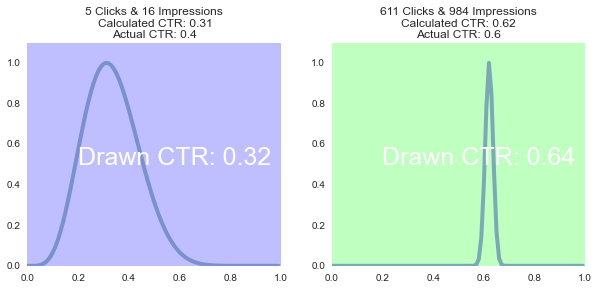

In [10]:
clicks = [0, 0]
impressions = [0, 0]

# Keep the CTR's for each
ctrA_kp = []
ctrB_kp = []

regret = 0
regret_kp = []

for i in range(1000):

    ctrA = get_sample(priors, clicks[0], impressions[0])
    ctrB = get_sample(priors, clicks[1], impressions[1])

    # Did the user click?
    did_click = bool(return_click_choice(CTR_KNOWN[win_index]))

    # Increment metrics based on a click or not
    clicks, impressions = increment_vals(clicks, impressions, win_index, did_click)

    # Which won?
    ctrA = get_sample(priors, clicks[0], impressions[0])
    ctrB = get_sample(priors, clicks[1], impressions[1])
    
    ctrA_kp.append(ctrA)
    ctrB_kp.append(ctrB)
    
    win_index = np.argmax([ctrA, ctrB])
    
    regret += max(CTR_KNOWN) - CTR_KNOWN[win_index]
    regret_kp.append(regret)
    
sub_plot_beta(priors, clicks, impressions, 1);

# Plot the convergence of drawn CTRs and regret

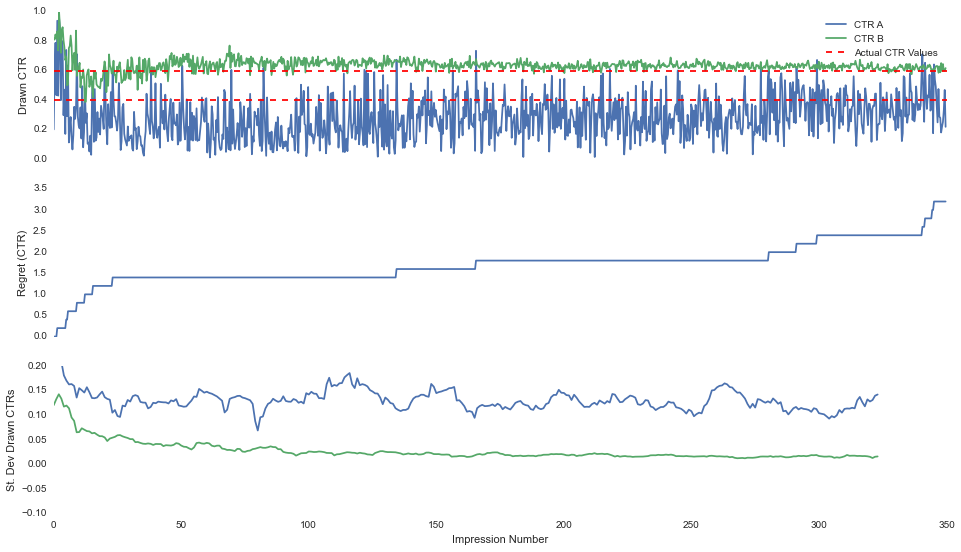

In [152]:
plt.figure(figsize=(16, 9))

# CTR's
plt.subplot(311)
plt.plot(ctrA_kp, label='CTR A')
plt.plot([0, len(ctrA_kp)], [CTR_KNOWN[0], CTR_KNOWN[0]], 'r--')
plt.plot(ctrB_kp, label='CTR B')
plt.plot([0, len(ctrB_kp)], [CTR_KNOWN[1], CTR_KNOWN[1]], 'r--', label='Actual CTR Values')

plt.ylabel('Drawn CTR')
#plt.title('Drawn CTR Values over {:,} Samples'.format(len(ctrA_kp)))
plt.legend()
plt.ylim([0, 1])
f = plt.gca()
f.patch.set_facecolor([0,0,0,0])
f.axes.get_xaxis().set_visible(False)

# REGRET
plt.subplot(312)
plt.plot(regret_kp)

plt.ylabel('Regret (CTR)')
#plt.title('CTR Regret vs. Sample Number')
f = plt.gca()
f.patch.set_facecolor([0,0,0,0])
f.axes.get_xaxis().set_visible(False)

# ST DEV of Drawn CTRs
plt.subplot(313)

inds = np.arange(0, len(ctrA_kp), 3)
win_width = 10
plt.plot([np.std(ctrA_kp[inds[i]:inds[i+win_width]]) for i in range(len(inds)-win_width)])
plt.plot([np.std(ctrB_kp[inds[i]:inds[i+win_width]]) for i in range(len(inds)-win_width)])
plt.ylim([-.1, .2])
plt.xlabel('Impression Number')
plt.ylabel('St. Dev Drawn CTRs')
#plt.title('St. Dev. of Drawn CTRs vs. Sample Number')

f = plt.gca()
f.patch.set_facecolor([0,0,0,0])
    
plt.show()

# Plots for slideshow

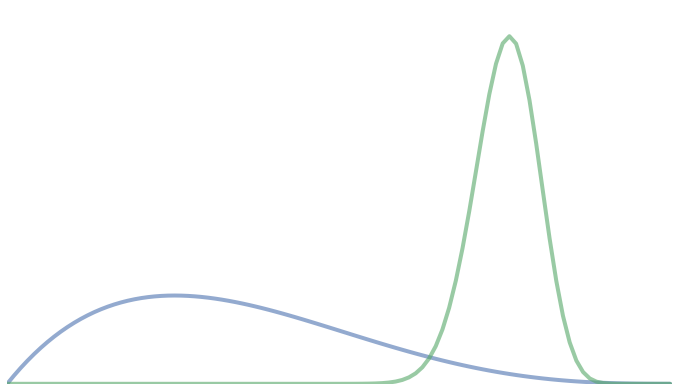

In [44]:
clicks = [1, 60]
impressions = [4, 80]
plt.figure(figsize=(16*.75, 9*.75))
plot_beta(priors, clicks[0], impressions[0], .3, normalize=0)
plot_beta(priors, clicks[1], impressions[1], .9, normalize=0)
plt.title('')

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
frame1.patch.set_facecolor([0,0,0,0])

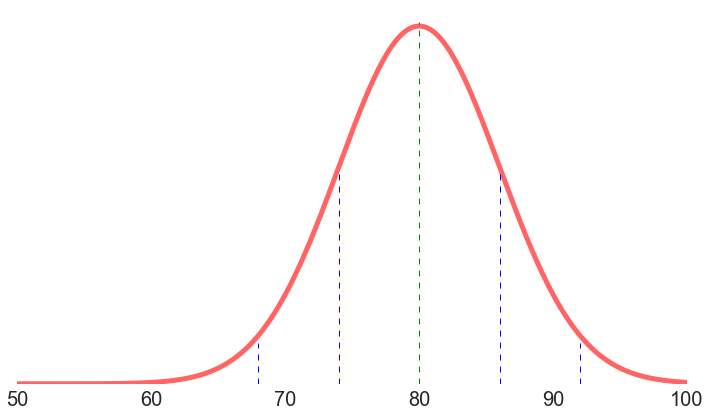

In [111]:
# Make a Gaussian PDF
from scipy.stats import norm
mn = 80
std = 6
x = np.linspace(0, 100, 1000)
pdf = norm.pdf(x, loc=mn, scale=std)

plt.figure(figsize=(16*.75, 9*.75))
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6)
frame1 = plt.gca()
mx = pdf.max()*1.01
# plt.ylim([0, .41])
# frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
frame1.patch.set_facecolor([0,0,0,0])

plt.plot([mn, mn], [0, mx], 'g--', lw=1)

# ONE std
plt.plot([mn+std, mn+std], [0, .04], 'b--', lw=1)
plt.plot([mn-std, mn-std], [0, .04], 'b--', lw=1)

# TWO std's
plt.plot([mn+std*2, mn+std*2], [0, .0075], 'b--', lw=1)
plt.plot([mn-std*2, mn-std*2], [0, .0075], 'b--', lw=1)
plt.xlim([50, 100])

plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

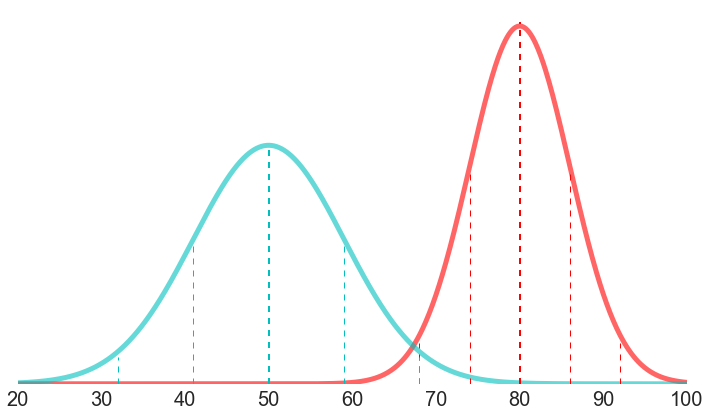

In [175]:
# Make a Gaussian PDF
from scipy.stats import norm
mn = 80
std = 6

x = np.linspace(0, 100, 1000)
pdf = norm.pdf(x, loc=mn, scale=std)

mn2 = 50
std2 = 9
pdf2 = norm.pdf(x, loc=mn2, scale=std2)

plt.figure(figsize=(16*.75, 9*.75))
plt.plot(x, pdf, 'r-', lw=5, alpha=0.6)
plt.plot(x, pdf2, 'c-', lw=5, alpha=0.6)

frame1 = plt.gca()
mx = pdf.max()*1.01
mx2 = pdf2.max()*1.005
# plt.ylim([0, .41])
# frame1.axes.get_xaxis().set_visible(False)
frame1.axes.get_yaxis().set_visible(False)
frame1.patch.set_facecolor([0,0,0,0])

plt.plot([mn, mn], [0, mx], 'r--', lw=2)
plt.plot([mn2, mn2], [0, mx2], 'c--', lw=2)

# ONE std
plt.plot([mn+std, mn+std], [0, .04], 'r--', lw=1)
plt.plot([mn-std, mn-std], [0, .04], 'r--', lw=1)

# TWO std's
plt.plot([mn+std*2, mn+std*2], [0, .0075], 'r--', lw=1)
plt.plot([mn-std*2, mn-std*2], [0, .0075], 'r--', lw=1)

# DIST 2
# ONE std
plt.plot([mn2+std2, mn2+std2], [0, mx2*.6], 'c--', lw=1)
plt.plot([mn2-std2, mn2-std2], [0, mx2*.6], 'c--', lw=1)

# TWO std's
plt.plot([mn2+std2*2, mn2+std2*2], [0, .005], 'c--', lw=1)
plt.plot([mn2-std2*2, mn2-std2*2], [0, .005], 'c--', lw=1)
plt.xlim([20, 100])


plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

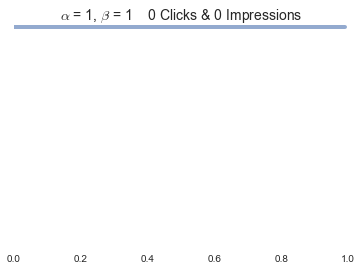

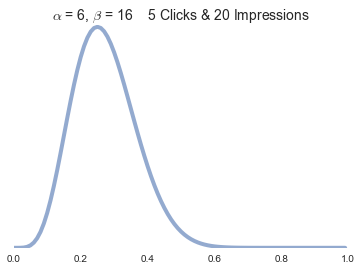

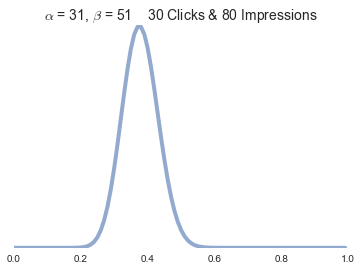

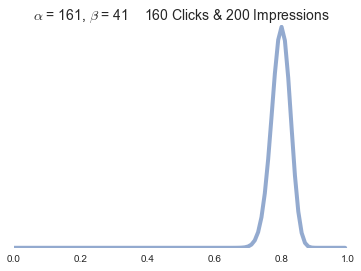

In [211]:
for clicks, impressions in zip([0, 5, 30, 160], [0, 20, 80, 200]):
    plot_beta(priors=[1,1], clicks=clicks, impressions=impressions, ctr_known=0.4, normalize=1)
    plt.title(r'$\alpha$ = {:}, $\beta$ = {:}    {:} Clicks & {:} Impressions'.
              format(1+clicks, 1 + impressions - clicks, clicks, impressions),
              fontsize=14)
    
    plt.ylim([0, 1.01])
    plt.show()